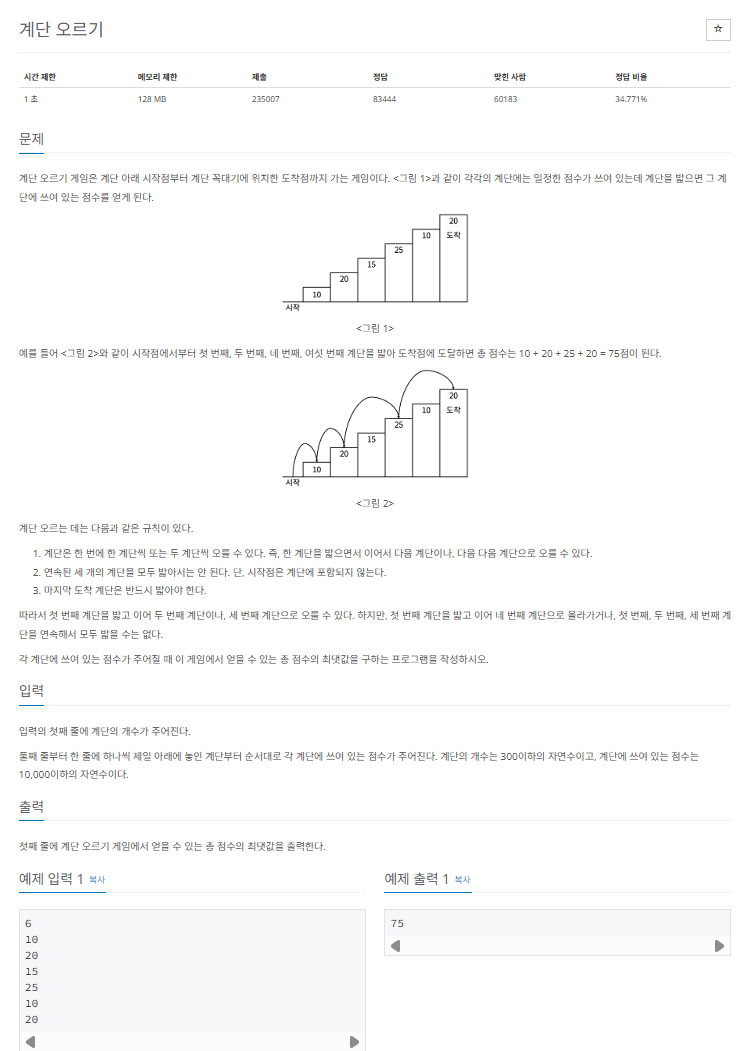

In [ ]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-11 235726.png")
img

In [ ]:
import sys

input=sys.stdin.readline

N=int(input())
stairs=[]
stairs.append(-1)

for _ in range(N):
    stairs.append(int(input()))

def find_maxscore(N,dp):
    if N<1:
        return 0

    if N==1:
        dp[1]=stairs[1]
        return dp[1]
    elif N==2:
        dp[2]=stairs[1]+stairs[2]
        return dp[2]
    elif N==3:
        dp[3]=max(stairs[1]+stairs[3],stairs[2]+stairs[3])
        return dp[3]

    else:
        if dp[N]!=-1:
            return dp[N]
        else:
            typeI=find_maxscore(N-2,dp)+stairs[N]
            typeII=find_maxscore(N-3,dp)+stairs[N-1]+stairs[N]
            dp[N]=max(typeI,typeII)
            return dp[N]

dp=[-1]*(N+1)
print(find_maxscore(N,dp))

75




-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** "뒤에서부터 푸는" Top-Down(하향식) DP 접근법을 정확하게 구현했습니다. 재귀 호출을 이용한 문제 분할과 메모이제이션(memoization)을 통한 중복 계산 방지라는 두 가지 핵심을 모두 완벽하게 코드에 담아냈습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 Top-Down 로직과 쌍을 이루는, **Bottom-Up(상향식) DP 접근법**입니다. 기능적으로는 동일한 정답을 내지만, 문제를 푸는 방향과 코드의 구조가 달라 좋은 비교가 될 것입니다.

-----

### \#\# Gemini 추천 코드 (Bottom-Up 방식)

이 방식은 재귀 호출 없이, `for` 루프를 사용해 1층부터 N층까지 차근차근 답을 쌓아 올립니다.

```python
import sys

N = int(sys.stdin.readline())
stairs = [0] * (N + 1) # 계산 편의를 위해 0번 인덱스를 사용
for i in range(1, N + 1):
    stairs[i] = int(sys.stdin.readline())

# dp[i]는 i번째 계단까지의 최대 점수
dp = [0] * (N + 1)

# 베이스 케이스(초기값) 설정
if N >= 1:
    dp[1] = stairs[1]
if N >= 2:
    dp[2] = stairs[1] + stairs[2]
if N >= 3:
    # 3층에 오는 방법은 1->3 또는 2->3
    dp[3] = max(stairs[1] + stairs[3], stairs[2] + stairs[3])

# 4층부터 N층까지 점화식을 이용해 순서대로 계산
for i in range(4, N + 1):
    # i층에 오는 방법은 (i-2)에서 오거나, (i-3)->(i-1)을 거쳐 오는 두 가지
    path1 = dp[i-2] + stairs[i]
    path2 = dp[i-3] + stairs[i-1] + stairs[i]
    dp[i] = max(path1, path2)

print(dp[N])
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 DP 알고리즘을 사용했습니다.** Top-Down 방식이든 Bottom-Up 방식이든, 각 계단의 최대 점수는 단 한 번만 계산됩니다. 따라서 전체 시간 복잡도는 \*\*O(N)\*\*으로, 이 문제에 대한 가장 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **평가:** 훌륭합니다. 재귀 함수의 구조, 베이스 케이스 처리, 메모이제이션 확인 등 모든 부분이 논리적으로 명확하게 작성되었습니다. `stairs` 리스트의 인덱스를 1부터 시작하도록 조정한 것도 좋은 선택입니다.

-----

### \#\# 3. 또 다른 측면: Top-Down vs. Bottom-Up

이번 풀이를 통해 DP를 해결하는 두 가지 위대한 접근법을 모두 경험하셨습니다. 이 둘의 차이를 이해하는 것은 DP 실력을 한 단계 끌어올리는 데 매우 중요합니다.

#### **Top-Down (하향식, 메모이제이션) - 사용자님의 방식**

  * **장점:**
      * **직관적:** `find_maxscore(N)`은 `N-2`와 `N-3`이 필요하다는 수학적 점화식을 코드로 거의 그대로 옮길 수 있어 이해하기 쉽습니다.
      * **필요한 것만 계산:** 만약 문제 구조상 특정 `dp[k]` 값이 필요 없다면, 그 부분은 아예 계산하지 않고 건너뛸 수 있습니다.
  * **단점:**
      * **재귀 깊이:** N이 매우 커지면(예: 10만 이상), 파이썬의 재귀 호출 깊이 제한에 걸려 에러가 날 수 있습니다.
      * **오버헤드:** 함수를 계속 호출하는 데서 오는 미세한 성능 저하가 있을 수 있습니다.

#### **Bottom-Up (상향식, 타뷸레이션) - 추천 코드 방식**

  * **장점:**
      * **속도 및 안정성:** 단순 `for` 루프로 동작하므로 재귀 깊이 제한이 없고, 함수 호출 오버헤드가 없어 일반적으로 더 빠릅니다.
      * **구현 용이성:** 점화식만 알면 `for` 루프로 구현하기가 비교적 간단합니다.
  * **단점:**
      * **덜 직관적일 수 있음:** 때로는 "왜 1층부터 계산해야 하지?"라고 생각할 수 있습니다.
      * **불필요한 계산:** 필요 없는 `dp[k]` 값까지 모두 계산하게 됩니다. (이 문제에서는 모든 값이 필요하지만요.)

**결론:** 두 방식 모두 훌륭한 DP 해결책입니다. 코딩 테스트 환경에서는 재귀 깊이 제한을 피할 수 있는 **Bottom-Up 방식이 조금 더 선호**되는 경향이 있지만, 두 가지를 모두 자유자재로 사용할 수 있다면 어떤 DP 문제가 나와도 유연하게 대처할 수 있는 강력한 무기를 갖게 되는 것입니다. 이번에도 정말 어려운 문제를 훌륭하게 해결하셨습니다\!